In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Equtations

Starting equations:

$$
T = (1-R)^2e^{-\alpha d}
$$

as $I_0=(1-R)^2$ in Beer-Lambert law. Therefore absorption coefficient $\alpha$ [cm-1]:

$$
\alpha = \frac{1}{d} \ln\left(\frac{(1-R)^2}{T}\right)
$$

where d is the sample thickness, R and T are reflection and transmission (fractional), respectively. Neglecting fresnel reflection this simplifies to

$$
\alpha = -\frac{1}{d} \ln(T).
$$

Using the cross-section of OH at 2.73um, $\sigma_{OH} =  1.2E-19$cm-1, and knowledge that absorption at this wavelength in glass is due to water, we can evaluate the number density of OH [cm-3]

$$
N_{OH} = \frac{\alpha}{\sigma_{OH}}
$$

[1] DOI: 10.1016/0925-3467(95)00063-1

To convert to ppm: https://doi.org/10.1016/j.vibspec.2008.01.004

Note: Because the OHabsorption peak shifts slightly depending on the OH concentration, the optimal method is to search for the exact Tmin, instead measuring the Tmin at a fixed wavelength.

In [2]:
# Thickness of samples (cm)
d = 0.11 

# Absorption cross section of OH in glass (cm2) @ 2.73um or 3662cm-1 
sig_OH = 1.2E-19

# FTIR

Text(0.5,0,'Wavelength (um)')

C:\Users\mn14tm\AppData\Local\Continuum\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


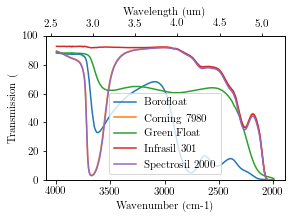

In [32]:
path = './FTIR/'
files = [x for x in os.listdir(path) if '.DPT'in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

store = {}
for f in files:
    result = np.genfromtxt(path + f)
    f = f.split('.')[0]
    # Wavenumber
    x = result[:, 0]
    # Transmission
    y = result[:, 1]
    ax1.plot(x, 100*y, label=f)
    
    # Store number of OH
    y = y[np.where(x >= 3663)[0][0]]
    alpha = -np.log(y)/d
    store[f] = alpha / sig_OH

# In wavenumber so x is descending
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (\%)')
ax1.legend()
ax2.set_ylim(0, 100)
lb, ub = ax1.get_xlim()
ax2.set_xlim(10000/lb, 10000/ub)
ax2.set_xlabel('Wavelength (um)')

C:\Users\mn14tm\AppData\Local\Continuum\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


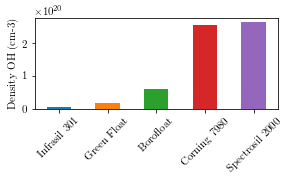

In [33]:
store = pd.Series(store, name='Sample')
store = store.sort_values()

fig, ax = plt.subplots()
store.plot(kind='bar', rot=45)
ax.set_ylabel('Density OH (cm-3)')
plt.tight_layout()

# Individual Sample

(0, 100)

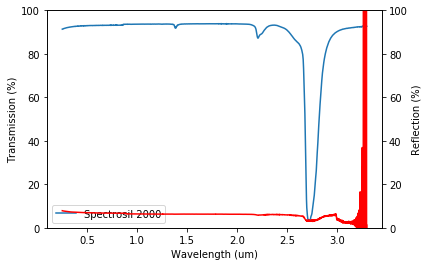

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

path = './UVVIS/Transmission/data/'
f = [x for x in os.listdir(path) if '.csv'in x and 'Spectrosil' in x][0]
result = np.genfromtxt(path + f, delimiter=',', skip_header=1)
f = f.split('.')[0]
# Wavelength (um)
x = result[:, 0] / 1000
# Transmission
y = result[:, 1] / 100
ax1.plot(x, 100*y, label=f)
ax1.legend()
ax1.set_xlabel('Wavelength (um)')
ax1.set_ylabel('Transmission (%)')
ax1.set_ylim(0, 100)

path = './UVVIS/URA/'
f = [x for x in os.listdir(path) if '.csv'in x and 'Spectrosil' in x][0]
result = np.genfromtxt(path + f, delimiter=',', skip_header=1)
f = f.split('.')[0]
# Wavelength (um)
x = result[:, 0] / 1000
# Reflection
y = result[:, 1] / 100

ax2.plot(x, 100*y, label=f, color='red')
ax2.set_ylabel('Reflection (%)')
ax2.set_ylim(0, 100)

# UV-VIS

C:\Users\mn14tm\AppData\Local\Continuum\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


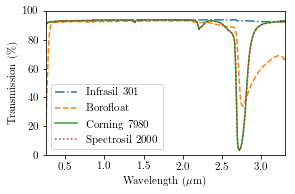

In [29]:
path = './UVVIS/Transmission/data/'
files = [x for x in os.listdir(path) if '.csv'in x and 'Correction' not in x]

myorder=[3,0,2,1,4]
files = [files[i] for i in myorder]

from itertools import cycle
lines = ["-.", "--", "-", ":"]
linecycler = cycle(lines)

fig, ax1 = plt.subplots()
store = {}
for f in files:
    result = np.genfromtxt(path + f, delimiter=',', skip_header=1)
    f = f.split('.')[0]
    
    if f == 'Green Float':
        pass
    else:
        # Wavelength (um)
        x = result[:, 0] / 1000
        # Transmission
        y = result[:, 1] / 100

        ax1.plot(x, 100*y, next(linecycler), label=f)

        # Store number of OH
        y = y[np.where(x == 2.73)[0][0]]
        alpha = np.log(y)/-d
        store[f] = alpha / sig_OH

ax1.legend()
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Transmission (\%)')
ax1.set_ylim(0, 100)
ax1.set_xlim(0.25, 3.3)
plt.savefig('UVVIS_substrates')

In [30]:
store

{'Infrasil 301': 5.524619802580877e+18,
 'Borofloat': 6.1111854635519435e+19,
 'Corning 7980': 2.4968341864607587e+20,
 'Spectrosil 2000': 2.5810531267144057e+20}

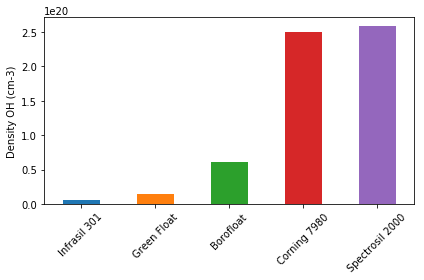

In [7]:
store = pd.Series(store, name='Sample')
store = store.sort_values()

fig, ax = plt.subplots()
store.plot(kind='bar', rot=45)
ax.set_ylabel('Density OH (cm-3)')
plt.tight_layout()

(0.25, 3)

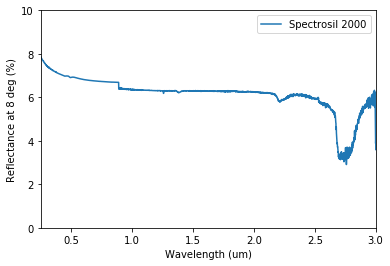

In [8]:
path = './UVVIS/URA/'
files = [x for x in os.listdir(path) if '.csv'in x and 'Correction' not in x]

fig, ax1 = plt.subplots()
store = {}
for f in files:
    result = np.genfromtxt(path + f, delimiter=',', skip_header=1)
    f = f.split('.')[0]
    # Wavelength (um)
    x = result[:, 0] / 1000
    # Transmission
    y = result[:, 1] / 100
    
    ax1.plot(x, 100*y, label=f)

ax1.legend()
ax1.set_xlabel('Wavelength (um)')
ax1.set_ylabel('Reflectance at 8 deg (%)')
ax1.set_ylim(0, 10)
ax1.set_xlim(.25, 3)

# Plot UV-VIS and FTIR data together

<IPython.core.display.Javascript object>


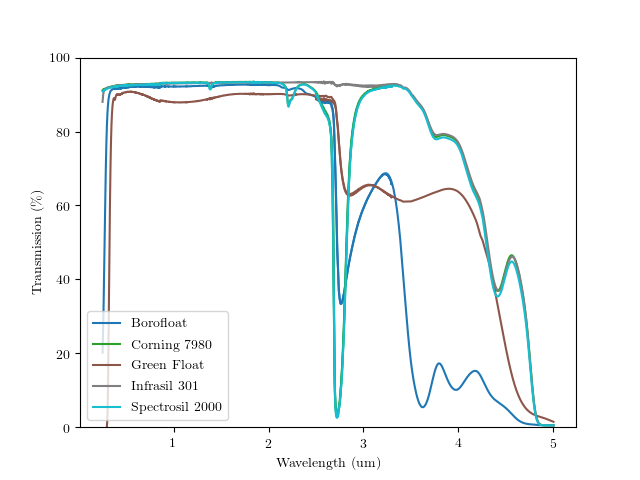

(0, 100)

In [41]:
fig, ax1 = plt.subplots()

path = './UVVIS/Transmission/data/'
files = [x for x in os.listdir(path) if '.csv'in x and 'Correction' not in x]

# Color map - unique for each sample
samples = [f.split('.')[0] for f in files]
colors = np.arange(len(samples))
color_dict = dict(zip(samples, colors))
import matplotlib.colors as mcolors
import matplotlib.cm as cmx
cNorm  = mcolors.Normalize(vmin=0, vmax=len(samples)-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('tab10') )

for f in files:
    result = np.genfromtxt(path + f, delimiter=',', skip_header=1)
    f = f.split('.')[0]
    # Wavelength (um)
    x = result[:, 0] / 1000
    # Transmission
    y = result[:, 1] / 100
    y -= 0.005
    
    colorVal = scalarMap.to_rgba(color_dict[f])
    ax1.plot(x, 100*y, color=colorVal)

path = './FTIR/'
files = [x for x in os.listdir(path) if '.DPT'in x]

for f in files:
    result = np.genfromtxt(path + f)
    f = f.split('.')[0]
    # Wavenumber
    x = 10E3/result[:, 0]
    # Transmission
    y = result[:, 1]
    # NOTE 1% OFFSET BETWEEN UVVIS AND FTIR. NOT SURE WHICH IS RIGHT.
    y += 0.005
    
    colorVal = scalarMap.to_rgba(color_dict[f])
    ax1.plot(x, 100*y, label=f, color=colorVal)
    
ax1.legend()
ax1.set_xlabel('Wavelength (um)')
ax1.set_ylabel('Transmission (\%)')
ax1.set_ylim(0, 100)
# ax1.set_xlim(0.25, 5)

In [72]:
# Update plot parameters for publication
def update():
    # Set figure size
    WIDTH = 412.564  # the number (in pt) latex spits out when typing: \the\linewidth
    FACTOR = 0.75  # the fraction of the width you'd like the figure to occupy
    fig_width_pt = WIDTH * FACTOR

    inches_per_pt = 1.0 / 72.27
    golden_ratio = (np.sqrt(5) - 1.0) / 2.0  # because it looks good

    fig_width_in = fig_width_pt * inches_per_pt  # figure width in inches
    fig_height_in = fig_width_in * golden_ratio  # figure height in inches
    fig_dims = [fig_width_in, fig_height_in]  # fig dims as a list

    # Update rcParams for figure size
    params = {
        'font.size': 11.0,
        'text.usetex': True,
        'font.family': 'serif',
        'font.serif': 'cm',
        'savefig.dpi': 300,
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight',
        'figure.figsize': fig_dims,
    }
    plt.rcParams.update(params)
    
update()

In [ ]:
path = './UVVIS/Transmission/data/'
files = [x for x in os.listdir(path) if '.csv'in x and 'Correction' not in x]

myorder=[3,0,2,1,4]
files = [files[i] for i in myorder]

from itertools import cycle
lines = ["-.", "--", "-", ":"]
linecycler = cycle(lines)

fig, ax1 = plt.subplots()
store = {}
for f in files:
    result = np.genfromtxt(path + f, delimiter=',', skip_header=1)
    f = f.split('.')[0]
    
    if f == 'Green Float':
        pass
    else:
        # Wavelength (um)
        x = result[:, 0] / 1000
        # Transmission
        y = result[:, 1] / 100

        ax1.plot(x, 100*y, next(linecycler), label=f)

        # Store number of OH
        y = y[np.where(x == 2.73)[0][0]]
        alpha = np.log(y)/-d
        store[f] = alpha / sig_OH

ax1.legend()
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Transmission (\%)')
ax1.set_ylim(0, 100)
ax1.set_xlim(0.25, 3.3)
plt.savefig('UVVIS_substrates')

<IPython.core.display.Javascript object>


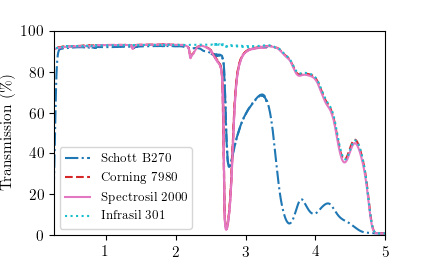

In [80]:
fig, ax1 = plt.subplots()

path = './UVVIS/Transmission/data/'
files = [x for x in os.listdir(path) if '.csv'in x and 'Correction' not in x]
files = [x for x in files if 'Green' not in x]

myorder=[2,0,3,1]
files = [files[i] for i in myorder]

from itertools import cycle
lines = ["-.", "--", "-", ":"]
linecycler = cycle(lines)

# Color map - unique for each sample
samples = [f.split('.')[0] for f in files]
colors = np.arange(len(samples))
color_dict = dict(zip(samples, colors))
import matplotlib.colors as mcolors
import matplotlib.cm as cmx
cNorm  = mcolors.Normalize(vmin=0, vmax=len(samples)-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('tab10') )

for f in files:
    result = np.genfromtxt(path + f, delimiter=',', skip_header=1)
    f = f.split('.')[0]
    # Wavelength (um)
    x = result[:, 0] / 1000
    # Transmission (%)
    y = result[:, 1]
    y -= 0.5
    
    colorVal = scalarMap.to_rgba(color_dict[f])
    ax1.plot(x, y, next(linecycler),color=colorVal)

path = './FTIR/'
files = [x for x in os.listdir(path) if '.DPT'in x]
files = [x for x in files if 'Green' not in x]
files = [files[i] for i in myorder]

for f in files:
    result = np.genfromtxt(path + f)
    f = f.split('.')[0]
    # Wavenumber to wavelength
    x = 10E3/result[:, 0]
    # Transmission (%)
    y = result[:, 1] * 100
    # NOTE 1% OFFSET BETWEEN UVVIS AND FTIR. NOT SURE WHICH IS RIGHT.
    y += .7
    
    colorVal = scalarMap.to_rgba(color_dict[f])
    ax1.plot(x, y, next(linecycler), label=f, color=colorVal)
    
ax1.legend(fontsize='small')
ax1.set_xlabel('Wavelength (um)')
ax1.set_ylabel('Transmission (\%)')
ax1.set_ylim(0, 100)
ax1.set_xlim(0.25, 5)

plt.savefig('absorption_substrates')